In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("Final Fashion Dataset.csv")

# Basic exploration
print("Dataset Shape:", df.shape)
print("Column Info:", df.info())

Dataset Shape: (36484, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 

In [33]:
df.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
dtype: int64

In [34]:
print("Descriptive Stats:", df.describe())

Descriptive Stats:             user_id            id          year       ratings   Price (USD)
count  36484.000000  36484.000000  36484.000000  36484.000000  36484.000000
mean   55673.109336  27860.189124   2012.461737      3.600839     33.828610
std    25987.221109  16562.799723      1.860980      1.279767     11.320579
min    10022.000000   1163.000000   2007.000000      1.000000     10.000000
25%    32865.000000  13247.000000   2011.000000      3.000000     25.000000
50%    55706.000000  26471.500000   2012.000000      4.000000     34.000000
75%    78386.000000  41718.250000   2012.000000      5.000000     42.000000
max    99995.000000  60000.000000   2018.000000      5.000000     66.000000


In [35]:
df.dropna(inplace=True)
df.usage.value_counts()

Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: usage, dtype: int64

In [36]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['user_id','id','year','ratings','Price (USD)']

In [37]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,user_id,4891
1,id,36484
2,year,12
3,ratings,5
4,Price (USD),57


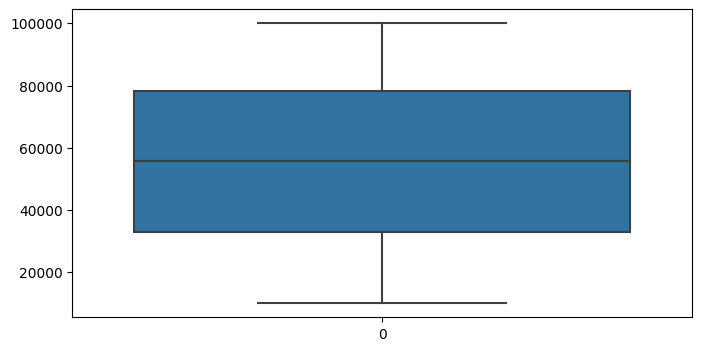

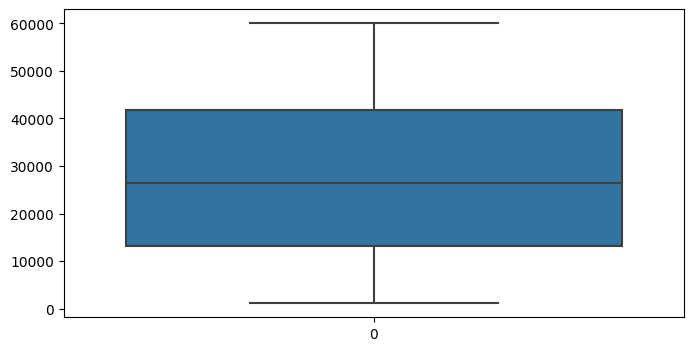

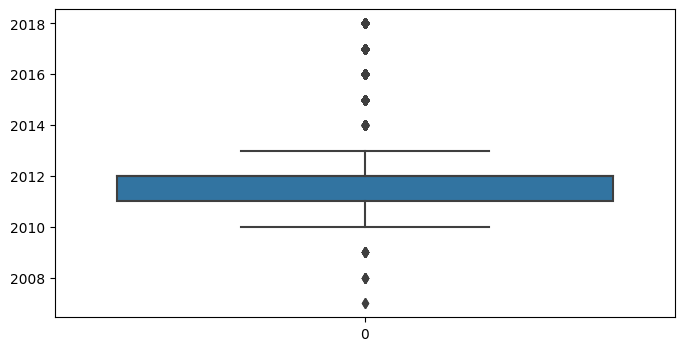

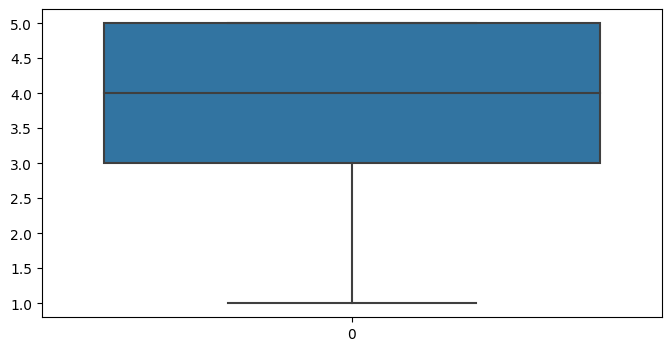

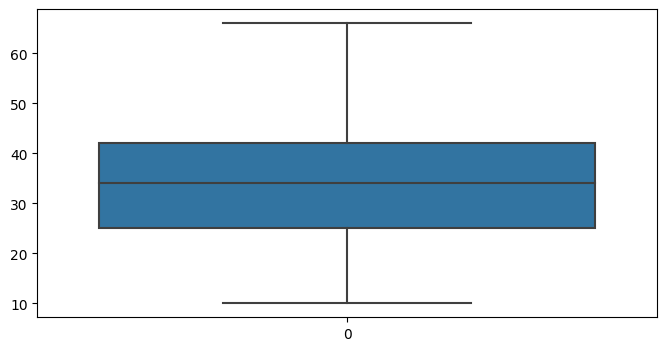

In [38]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

In [39]:
# Function to detect and remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filter out the outliers
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Applying the function to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df = remove_outliers_iqr(df, col)


In [40]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
6,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41
36476,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53
36477,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43
36479,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48


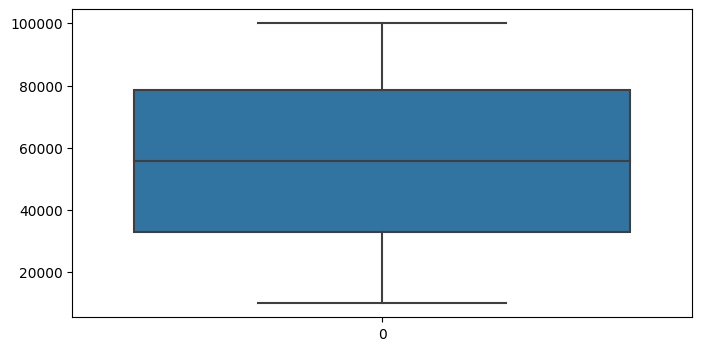

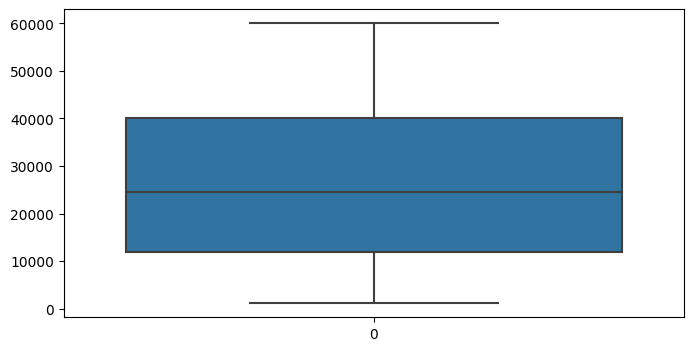

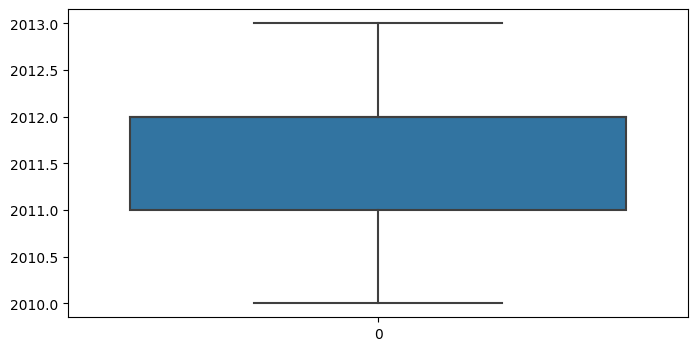

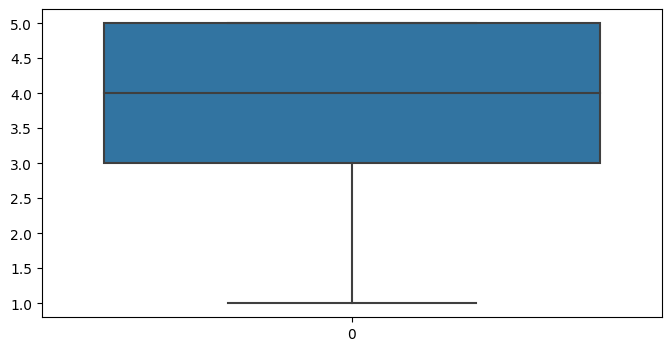

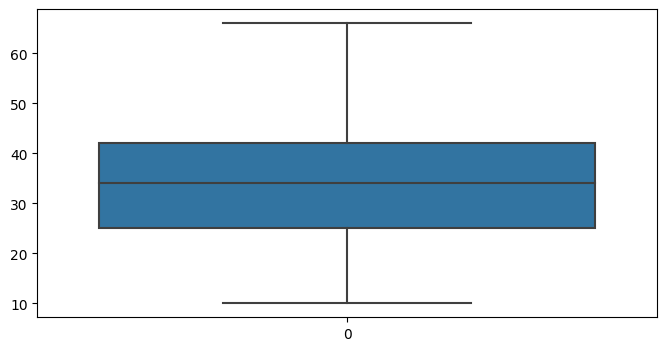

In [41]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

In [42]:
#histograms,categorical analysis to understand frequency of distribution
#bivarite analysis

In [43]:
# Label encoding for categorical columns
from sklearn.calibration import LabelEncoder
le = LabelEncoder()
df_lableencoded = df.copy()
for i in catnames:
    df_lableencoded[i] = le.fit_transform(df[i])

df_lableencoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46
1,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29
2,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39
3,46048,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39
6,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41
36476,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53
36477,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43
36479,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48


In [44]:
from sklearn.preprocessing import StandardScaler
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])
df_scaled

NameError: name 'df_encoded' is not defined

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions while keeping 95% of the variance
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


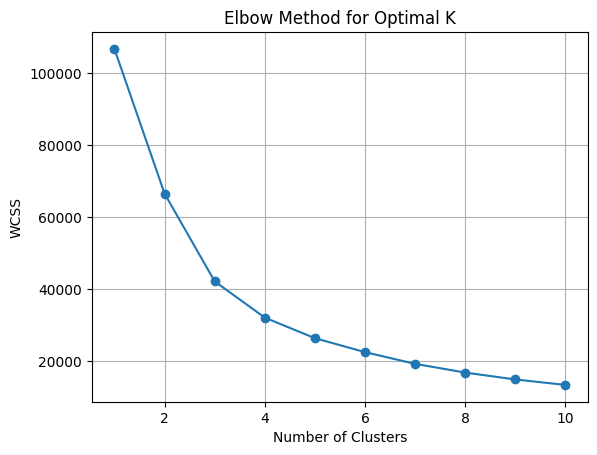

In [ ]:
from sklearn.cluster import KMeans

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot WCSS to visualize the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [ ]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,0.429872,-1.532470
1,0.436964,0.014366
2,2.464212,-0.116658
3,-0.264773,-1.068773
4,0.197315,0.542015
...,...,...
28546,-0.943306,-1.384033
28547,-2.547851,-1.992272
28548,1.120116,-1.742129
28549,1.313849,-1.894369


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,0.429872,-1.532470,2
1,0.436964,0.014366,2
2,2.464212,-0.116658,1
3,-0.264773,-1.068773,0
4,0.197315,0.542015,3
...,...,...,...
28546,-0.943306,-1.384033,0
28547,-2.547851,-1.992272,0
28548,1.120116,-1.742129,2
28549,1.313849,-1.894369,2


In [ ]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

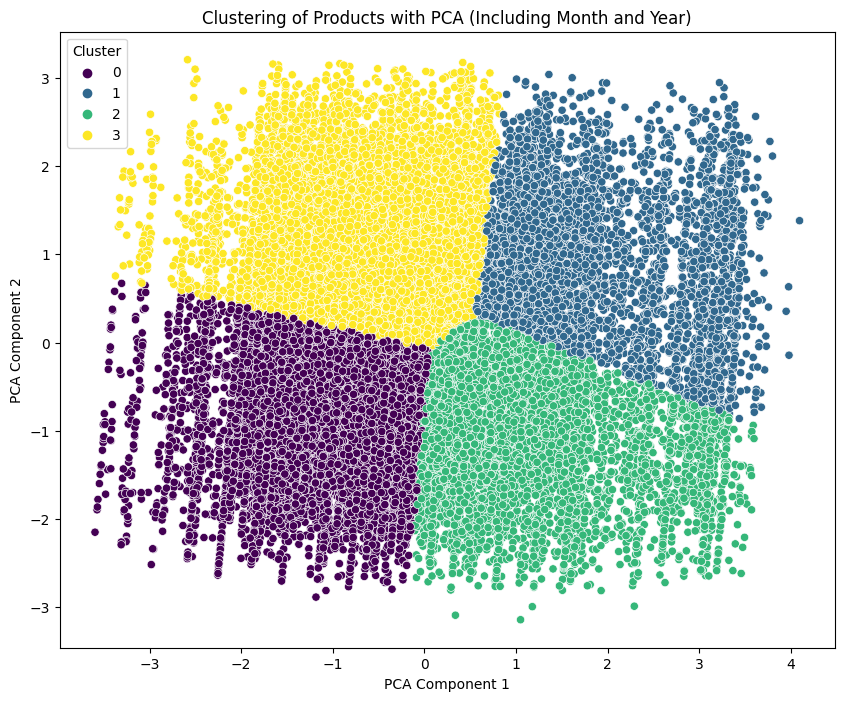

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2', 
    hue='cluster', 
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46,2
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29,2
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39,1
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39,0
4,28289,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,August,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",September,41,0
28547,18851,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,0
28548,55457,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",November,43,2
28549,40311,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",November,48,2


In [ ]:
# Create a copy of the original dataframe to avoid modifying it directly
df_lableencoded = df.copy()

# Dictionary to store LabelEncoder objects for each categorical column
label_encoders = {}

# Loop through categorical columns and apply Label Encoding
for column in catnames:
    encoder = LabelEncoder()
    df_lableencoded[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder

print("Encoded DataFrame:")
print(df_lableencoded)

# Create mappings for each specific column
subcategory_map = {
    original_label: encoded_label
    for original_label, encoded_label in zip(
        label_encoders['subCategory'].classes_,
        label_encoders['subCategory'].transform(label_encoders['subCategory'].classes_)
    )
}

gender_map = {
    original_label: encoded_label
    for original_label, encoded_label in zip(
        label_encoders['gender'].classes_,
        label_encoders['gender'].transform(label_encoders['gender'].classes_)
    )
}

colour_map = {
    original_label: encoded_label
    for original_label, encoded_label in zip(
        label_encoders['baseColour'].classes_,
        label_encoders['baseColour'].transform(label_encoders['baseColour'].classes_)
    )
}

# Print the mappings
print("Subcategory Mapping (Original to Encoded):", subcategory_map)
print("Gender Mapping (Original to Encoded):", gender_map)
print("Colour Mapping (Original to Encoded):", colour_map)




Encoded DataFrame:
       user_id     id  gender  masterCategory  subCategory  articleType  \
0        93810   8493       4               1            2           46   
1        24592  30757       2               1           10           23   
2        13278  14881       4               0            0           17   
3        46048  48449       2               1           10           63   
4        28289  12868       2               2            8           16   
...        ...    ...     ...             ...          ...          ...   
28546    73318  54078       2               2            8           48   
28547    18851  13183       2               2            8           48   
28548    55457  10264       2               2            8           16   
28549    40311  45378       4               2            8           14   
28550    85631   5864       3               2            8            7   

       baseColour  season    year  usage  \
0               1       0  2011.0   

In [ ]:
df_lableencoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_lableencoded['cluster'] = df['cluster']
df_lableencoded

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),cluster
0,93810,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46,2
1,24592,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29,2
2,13278,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39,1
3,46048,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39,0
4,28289,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,12868.jpg,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,73318,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,54078.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41,0
28547,18851,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,13183.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53,0
28548,55457,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,10264.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43,2
28549,40311,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,45378.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48,2


In [ ]:
df_lableencoded.isnull().sum()

user_id               0
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
cluster               0
dtype: int64

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select and scale specific numerical columns
numerical_features_scaled = scaler.fit_transform(df_lableencoded[['ratings', 'Price (USD)', 'year']])
scaled_numerical_df = pd.DataFrame(numerical_features_scaled, columns=['ratings', 'Price (USD)', 'year'])

# Concatenate the scaled numerical features with the remaining encoded columns
processed_df = pd.concat([
    df_lableencoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName', 'Month', 'cluster']],
    scaled_numerical_df
], axis=1)

print("Processed Dataset:")
print(processed_df)


Processed Dataset:
          id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season  usage                        

In [ ]:

processed_df['combined_features'] = processed_df[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_df['combined_features'])
# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())


#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Ensure that processed_dataset and tfidf_matrix share the same index order
processed_df = processed_df.reset_index(drop=True)
tfidf_matrix = tfidf_matrix[processed_df.index]

# Dictionary to store similarity matrices for each cluster
similarity_matrices = {}

# Loop through each cluster and calculate similarity matrices
for cluster_id in processed_df['cluster'].unique():
    # Filter the dataset to only items in the current cluster
    cluster_indices = processed_df[processed_df['cluster'] == cluster_id].index
    
    # Extract the TF-IDF vectors for items in this cluster
    cluster_tfidf = tfidf_matrix[cluster_indices]

    # Ensure cluster has at least two items to calculate similarity
    if cluster_tfidf.shape[0] > 1:
        # Calculate cosine similarity for the cluster
        similarity_matrices[cluster_id] = cosine_similarity(cluster_tfidf)
    else:
        print(f"Cluster {cluster_id} has less than 2 items; skipping similarity calculation.")


In [ ]:
le_dict = {}
le = LabelEncoder()
df_lableencoded['subCategory'] = le.fit_transform(df['subCategory'])
le_dict['subCategory'] = le

# Create mapping for subCategories
subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}

complementary_map = {
    'Topwear': ['Bottomwear', 'Footwear', 'Accessories', 'Jewellery'],
    'Bottomwear': ['Topwear', 'Footwear', 'Accessories'],
    'Watches': ['Topwear', 'Bottomwear', 'Footwear', 'Accessories'],
    'Socks': ['Footwear', 'Bottomwear', 'Accessories'],
    'Shoes': ['Topwear', 'Bottomwear', 'Accessories', 'Socks'],
    'Belts': ['Topwear', 'Bottomwear', 'Footwear'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Accessories'],
    'Bags': ['Topwear', 'Bottomwear', 'Footwear', 'Accessories'],
    'Innerwear': ['Topwear', 'Bottomwear'],
    'Sandal': ['Topwear', 'Bottomwear', 'Accessories'],
    'Shoe Accessories': ['Footwear', 'Bottomwear'],
    'Jewellery': ['Topwear', 'Dress', 'Accessories'],
    'Saree': ['Footwear', 'Jewellery', 'Accessories'],
    'Eyewear': ['Topwear', 'Footwear', 'Accessories'],
    'Scarves': ['Topwear', 'Footwear', 'Accessories'],
    'Dress': ['Footwear', 'Eyewear', 'Accessories', 'Jewellery'],
    'Loungewear and Nightwear': ['Innerwear', 'Footwear'],
    'Wallets': ['Topwear', 'Bottomwear', 'Accessories'],
    'Apparel Set': ['Footwear', 'Accessories'],
    'Headwear': ['Topwear', 'Footwear', 'Accessories'],
    'Mufflers': ['Topwear', 'Footwear', 'Accessories'],
    'Ties': ['Topwear', 'Bottomwear', 'Accessories'],
    'Accessories': ['Topwear', 'Bottomwear', 'Footwear', 'Jewellery'],
    'Gloves': ['Topwear', 'Footwear', 'Accessories'],
    'Stoles': ['Topwear', 'Footwear', 'Accessories']
}

# Create the label-encoded complementary map
labelencoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", labelencoded_complementary_map)

Encoded Complementary Map: {10: [2, 5], 2: [10], 12: [10, 2], 9: [2], 8: [10, 2, 9], 1: [10, 2], 4: [10, 2], 0: [10, 2], 5: [10], 7: [5], 3: [10], 6: [], 11: [10, 2]}


In [ ]:
df_lableencoded = df.copy()
for col in catnames:
    le = LabelEncoder()
    df_lableencoded[col] = le.fit_transform(df[col])
    le_dict[col] = le
#colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [ ]:
len(processed_df[processed_df.cluster==2].values)

6542

In [ ]:
def get_recommendations(product_id, df_encoded, similarity_matrices, encoded_complementary_map, encoded_complementary_colour_map):
    # Attempt to find the cluster ID for the given product ID
    cluster_id = df_encoded.loc[df_encoded['id'] == product_id, 'cluster'].values
    
    if len(cluster_id) == 0:
        print(f"Product ID {product_id} not found in the dataset.")
        return []
    
    cluster_id = cluster_id[0]
    print(f"Cluster ID: {cluster_id}")

    # Filter DataFrame for the cluster and get the product index
    cluster_df = df_encoded[df_encoded['cluster'] == cluster_id].reset_index(drop=True)
    
    product_index = cluster_df[cluster_df['id'] == product_id].index
    if product_index.empty:
        print(f"Product ID {product_id} not found in cluster {cluster_id}")
        return []

    product_index = product_index[0]
    print(f"Product Index in Cluster: {product_index}")

    # Gather product details
    product_details = cluster_df.loc[product_index]
    encoded_subcategory = product_details['subCategory']
    product_gender = product_details['gender']
    encoded_colour = product_details['baseColour']
    
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")

    # Calculate similarity scores and sort indices
    similarity_scores = similarity_matrices[cluster_id][product_index]
    similar_indices = similarity_scores.argsort()[::-1][1:]  # Exclude the first index (itself)

    recommendations = []
    recommended_subcategories = set()
    
    # Generate recommendations
    for index in similar_indices:
        recommended_product = cluster_df.iloc[index]
        recommended_subcategory = recommended_product['subCategory']
        recommended_colour = recommended_product['baseColour']

        # Check for complementary subcategories and colours
        if (recommended_subcategory in encoded_complementary_map.get(encoded_subcategory, []) and
            recommended_product['gender'] == product_gender and
            recommended_colour in encoded_complementary_colour_map.get(encoded_colour, []) and
            recommended_subcategory not in recommended_subcategories):

            recommendations.append(recommended_product['id'])
            recommended_subcategories.add(recommended_subcategory)

            # Stop if enough recommendations have been found
            if len(recommended_subcategories) >= 4:
                break

    if not recommendations:
        print("No recommendations found.")

    return recommendations


In [ ]:
product_id= 14881
recommended_products = get_recommendations(product_id,processed_df,similarity_matrices,labelencoded_complementary_map,labelencoded_complementary_map)
print("Recommended products:", recommended_products)

Cluster ID: 1
Product Index in Cluster: 0
Encoded Subcategory: 0, Gender: 4, Colour: 1
Recommended products: [37158, 17925]


In [ ]:
# List of recommended product IDs
recommended_product_ids = [14881,37158, 17925]

# Filter the DataFrame to get the original data for the recommended product IDs
recommended_products = df[df['id'].isin(recommended_product_ids)]

# Display the original data of the recommended products
print(recommended_products)


       user_id     id gender masterCategory subCategory articleType  \
2        13278  14881  Women    Accessories        Bags    Handbags   
18459    49552  17925  Women        Apparel  Bottomwear      Capris   
35030    28830  37158  Women        Apparel     Topwear        Tops   

      baseColour  season    year   usage  \
2          Black  Summer  2011.0  Casual   
18459       Blue    Fall  2011.0  Casual   
35030       Blue  Summer  2012.0  Casual   

                                      productDisplayName   filename  \
2      United Colors of Benetton Women Solid Black Ha...  14881.jpg   
18459                       Nike Women Casual Blue Capri  17925.jpg   
35030           United Colors of Benetton Women Blue Top  37158.jpg   

                                                    link  ratings  \
2      http://assets.myntassets.com/v1/images/style/p...        3   
18459  http://assets.myntassets.com/v1/images/style/p...        3   
35030  http://assets.myntassets.com/v1/images/

In [50]:
# List of recommended product IDs
recommended_product_ids = [12868,40683, 7887, 9367]

# Filter the DataFrame to get the original data for the recommended product IDs
recommended_products = df[df['id'].isin(recommended_product_ids)]

# Display the original data of the recommended products
print(recommended_products)


       user_id     id gender masterCategory subCategory   articleType  \
6        28289  12868    Men       Footwear       Shoes  Formal Shoes   
14183    10371  40683    Men        Apparel     Topwear       Tshirts   
20751    95948   7887    Men        Apparel  Bottomwear   Track Pants   
24577    28772   9367    Men    Accessories       Socks         Socks   

      baseColour  season    year   usage                 productDisplayName  \
6          Black  Spring  2012.0  Formal  Lee Cooper Men Formal Black Shoes   
14183       Blue  Summer  2012.0  Casual               Lee Men Blue T-shirt   
20751       Blue    Fall  2011.0  Casual       Proline Men Blue Track Pants   
24577       Blue    Fall  2011.0  Casual           Puma Men Ftpa Blue Socks   

        filename                                               link  ratings  \
6      12868.jpg  http://assets.myntassets.com/v1/images/style/p...        3   
14183  40683.jpg  http://assets.myntassets.com/v1/images/style/p...        2  